In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv('insurance.csv')


In [3]:
label = {}
for col in ['sex', 'smoker', 'region']: #Lặp qua danh sách các cột phân loại
    le = LabelEncoder() #dùng để biến đổi
    #dữ liệu phân loại thành số nguyên
    data[col] = le.fit_transform(data[col])
    #fit: mối quan hệ giữa các giá trị phân loại duy nhất trong cột và các số nguyên.
    #Transform: Áp dụng mã hóa, thay thế giá trị phân loại trong cột bằng các số nguyên tương ứng
    label[col] = le


In [4]:
X = data.drop(columns=['charges'])  # Loại bỏ cột 'charges' khỏi DataFrame data để lấy tất cả các cột còn lại làm đặc trưng (features)
y = data['charges']  # Lấy charge làm biến mục tiêu (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Test size: 20 % dữ liệu sẽ được đưa vào kiểm tra
#random_state: đảm bảo chia dữ liệu ngẫu nhiên nhưng có thể tái tạo được


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [6]:
#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
#Tạo mô hình hồi quy tuyến tính và huấn luyện trên dữ liệu đã chuẩn hóa
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}\n")


Linear Regression Results:
Mean Squared Error (MSE): 33635210.43
R² Score: 0.78



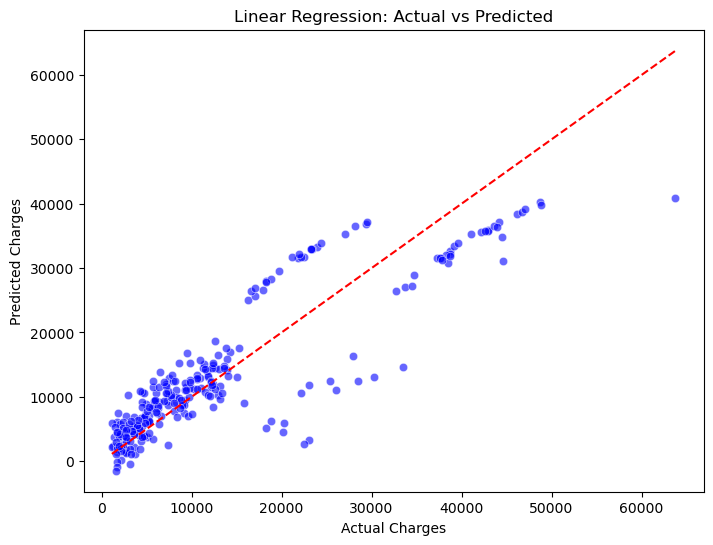

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường tham chiếu
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()


# Random Forest regression



In [9]:
#Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)
y_pred_forest = forest_model.predict(X_test_scaled)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_forest:.2f}")
print(f"R² Score: {r2_forest:.2f}\n")



Random Forest Regression Results:
Mean Squared Error (MSE): 20898625.74
R² Score: 0.87



### Feature Importance in Random Forest Regression

In [10]:

feature_importances = pd.Series(forest_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


smoker      0.608618
bmi         0.216291
age         0.134554
children    0.020199
region      0.013926
sex         0.006412
dtype: float64


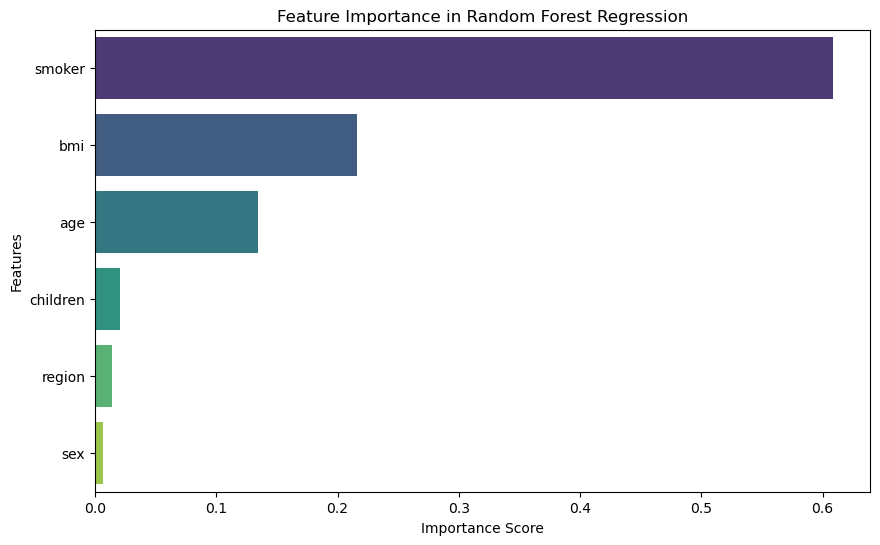

In [11]:
# Lấy tầm quan trọng của các đặc trưng
importances = forest_model.feature_importances_
feature_names = X.columns

# Tạo DataFrame để hiển thị
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in Random Forest Regression")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

##### In conclusion, the Random Forest Regression model highlights that the smoking status, body mass index, and age of the individuals are the most influential factors in predicting the target variable, while the number of children also plays a role, and the region and sex have relatively smaller contributions to the model's predictions.

# Chi square: Comparing sex and smoker


In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Đọc dữ liệu
data = pd.read_csv("insurance.csv")

# Tạo bảng tần suất giữa giới tính và tình trạng hút thuốc
contingency_table = pd.crosstab(data['sex'], data['smoker'])

# Kiểm định Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Kết quả
print("Chi-Square statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected frequencies:\n", expected)

# Diễn giải
if p < 0.05:
    print("There is a significant association between gender and smoking status.")
else:
    print("There is not a significant association between gender and smoking status.")



Chi-Square statistic: 7.39291081459996
p-value: 0.006548143503580696
Degrees of Freedom: 1
Expected frequencies:
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
There is a significant association between gender and smoking status.


# ANOVA: Kiểm tra charges có khác biệt giữa các vùng miền không?


In [13]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
data = pd.read_csv("insurance.csv")

# Extract 'charges' values for each group in 'region'
groups = [group['charges'].values for name, group in data.groupby('region')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)

# Display results
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Draw conclusions
if p_value < 0.05:
    print("Conclusion: There is a significant difference in average insurance charges between regions (p < 0.05).")
    print("This suggests that region may influence insurance charges.")
else:
    print("Conclusion: There is no significant difference in average insurance charges between regions (p >= 0.05).")
    print("This suggests that average insurance charges are relatively consistent across regions.")


F-statistic: 2.96962669358912
p-value: 0.0308933560705201
Conclusion: There is a significant difference in average insurance charges between regions (p < 0.05).
This suggests that region may influence insurance charges.


In [14]:
import numpy as np
# Let's create the training set by combining the previous X_train and y_train.
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

# Random seed
np.random.seed(42)

# Shuffle Randomly the training set
train = train.sample(frac=1)
train.head()

,age,sex,bmi,children,smoker,region,charges
1049,49,1,30.900,0,1,3,39727.61400
257,38,0,40.150,0,0,2,5400.98050
1022,47,1,36.080,1,1,2,42211.13820
1071,63,1,31.445,0,0,0,13974.45555
17,23,1,23.845,0,0,0,2395.17155


# OLS Regression

In [17]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
y_train = y_train.values
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          2.71e-308
Time:                        08:07:30   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04   1086.938    -10.991      0.0

### Model Summary
    - R-squared: 0.742 indicates that approximately 74.2% of the variance in the dependent variable y is explained by the model. This suggests a strong fit.
    - F-statistic: 508.7 with a very low p-value (2.71e-308) indicates that the model is statistically significant overall.
### Coefficients Interpretation
  1. Constant (Intercept):
     - Coefficient: -1.195e+04
     - This is the predicted value of y when all predictors are zero. It is significantly negative, suggesting that the baseline level is quite low.
  2. Age:
     - Coefficient: 257.0563
     - For each additional year in age, y increases by about 257.06 units, holding other variables constant. This effect is statistically significant (p < 0.001).
  3. Sex:
     - Coefficient: -18.7915
     - The effect of sex is not statistically significant (p = 0.960), indicating that it does not meaningfully predict y in this model.
   4. BMI:
      - Coefficient: 335.7815
      - This suggests that for each unit increase in BMI, y increases by approximately 335.78 units, with high statistical significance (p < 0.001).
   5. Children:
      - Coefficient: 425.0915
      - Each additional child is associated with an increase of about 425.09 units in y (p = 0.006), indicating a significant positive effect.
  6. Smoker:
      - Coefficient: 2.365e+04
      - Being a smoker is associated with a substantial increase in y by about 23,650 units, and it is highly significant (p < 0.001).
  7. Region:
      - Coefficient: -271.2843
      - This variable is not statistically significant (p = 0.112), suggesting that region does not have a meaningful impact on y in this model.
   8. Additional Statistics
        - Durbin-Watson: 2.085 indicates that there is likely no significant autocorrelation in the residuals.
        - Omnibus and Jarque-Bera tests: Both tests indicate that the residuals deviate from normality, as evidenced by their low p-values, which might require further investigation into the model's assumptions.
### Conclusion: 
 ###### The regression analysis indicates that age, BMI, number of children, and smoking status are significant predictors of y, while sex and region do not significantly contribute to the model. The overall fit of the model is strong, but attention should be paid to the residuals for potential non-normality. Further model diagnostics and potential transformations may be required for improving the model's validity.